In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***- Data Pre-processing and Cleaning***

In [2]:
# Loading the data set in python with pandas

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# To find out the Shape of our Data set

df.shape

(8807, 12)

In [4]:
# Name of the Columns in data set

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
# Information about data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8804 non-null   object 
 1   type          8804 non-null   object 
 2   title         8804 non-null   object 
 3   director      6170 non-null   object 
 4   cast          7979 non-null   object 
 5   country       7973 non-null   object 
 6   date_added    8794 non-null   object 
 7   release_year  8804 non-null   float64
 8   rating        8800 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8804 non-null   object 
 11  description   8804 non-null   object 
dtypes: float64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Checking Null values in data

df.isnull().sum()

show_id            3
type               3
title              3
director        2637
cast             828
country          834
date_added        13
release_year       3
rating             7
duration           3
listed_in          3
description        3
dtype: int64

In [7]:
# Dealing with missing Values (Replacing values)

df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)

In [8]:
# Dropping rows with low null values from specific columns

df.dropna(subset=["date_added", "rating"], inplace=True)

The easiest way to get rid of them would be to delete the rows with the missing data for missing values. However, this wouldn’t be beneficial to our EDA since it is a loss of information. Since “director,” “cast,” and “country” contain the majority of null values, we chose to treat each missing value is unavailable. The other two label “date_added” and “rating” contain an insignificant portion of the data, so it drops from the dataset. Finally, we can see that there are no more missing values in the data frame.

In [9]:
# Now Again checking Null values in data

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# ***- Data Visualization*** 

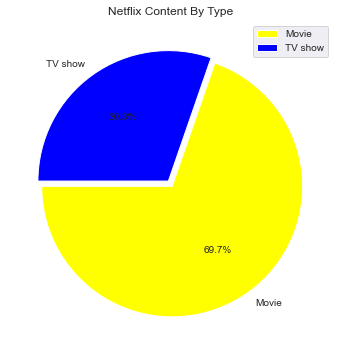

In [16]:
# Netflix content by Type

labels = ['Movie', 'TV show']
plt.figure(figsize=(12,6))
plt.title("Netflix Content By Type")
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025),labels=labels, colors=['yellow','blue'],autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

C:\Users\MirHassan\AppData\Local\Temp\ipykernel_3236\3748307474.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.year_added = pd.DatetimeIndex(df.date_added).year
C:\Users\MirHassan\AppData\Local\Temp\ipykernel_3236\3748307474.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
C:\Users\MirHassan\AppData\Local\Temp\ipykernel_3236\3748307474.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year


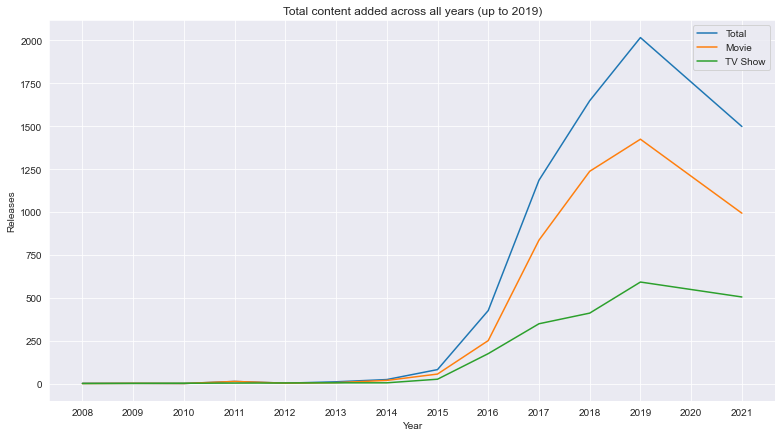

In [10]:
# Amount of Content as a Function of Time

netflix_movies_df = df[df.type.str.contains("Movie")]
netflix_shows_df = df[df.type.str.contains("TV Show")]
df.year_added = pd.DatetimeIndex(df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

netflix_year_df = df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]

movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]

# Total Content added from 2008 to 2021

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added across all years (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

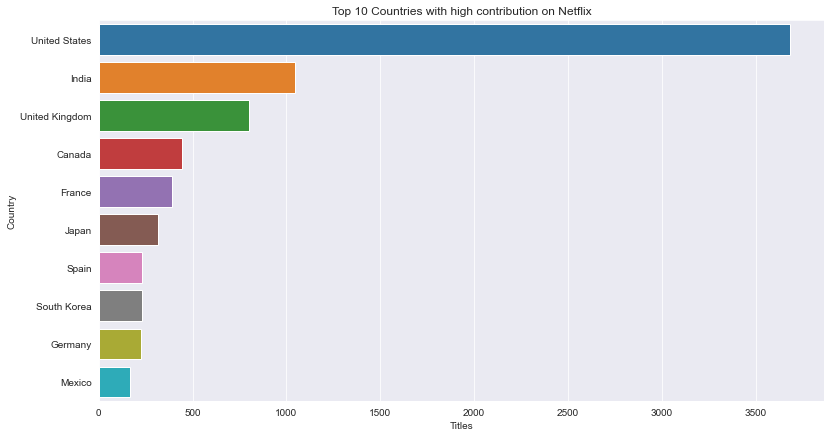

In [11]:
#Top 10 Countries with highest contribution on Netflix

filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10])
plt.title('Top 10 Countries with high contribution on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

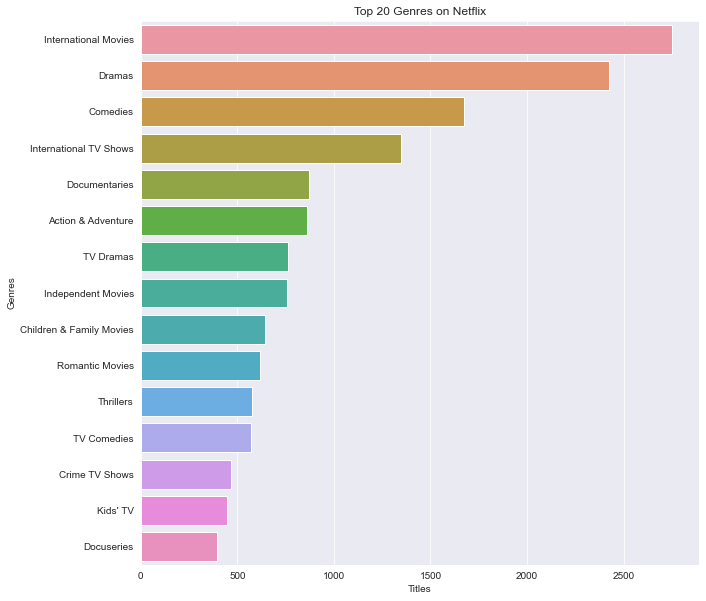

In [12]:
# Top 15 Genres in Netflix

filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

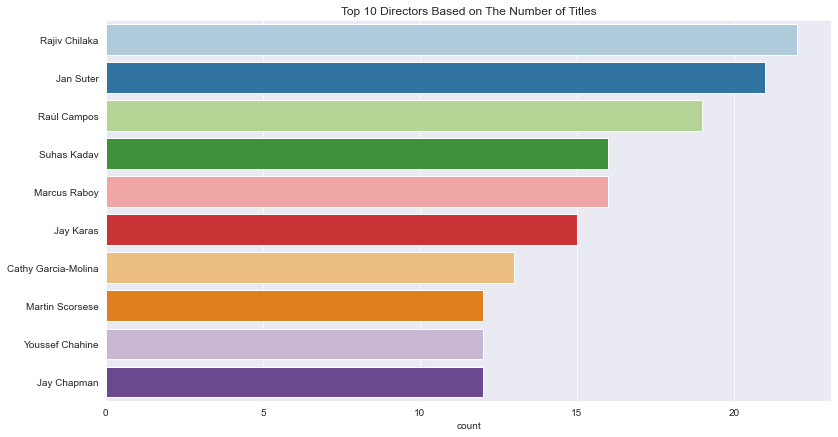

In [13]:
# Top 5 Directors on Netflix

filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Directors Based on The Number of Titles')
sns
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Paired')
plt.show()

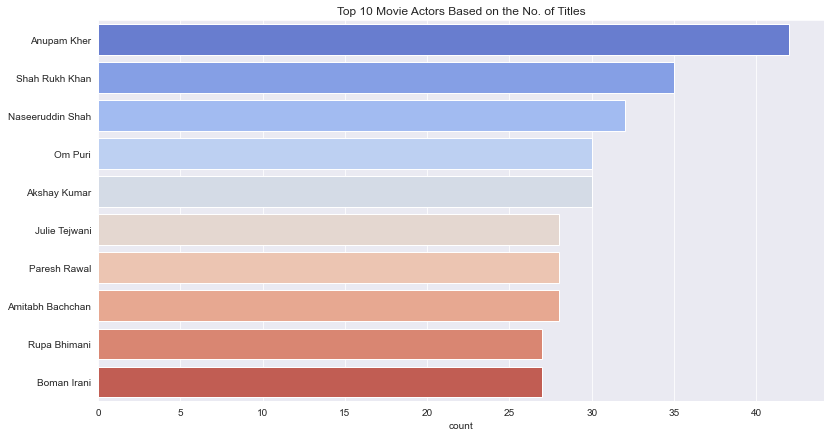

In [14]:
# Top 10 Netflix Movie Actors Based on Number of Titles

filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Movie Actors Based on the No. of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='coolwarm')
plt.show()

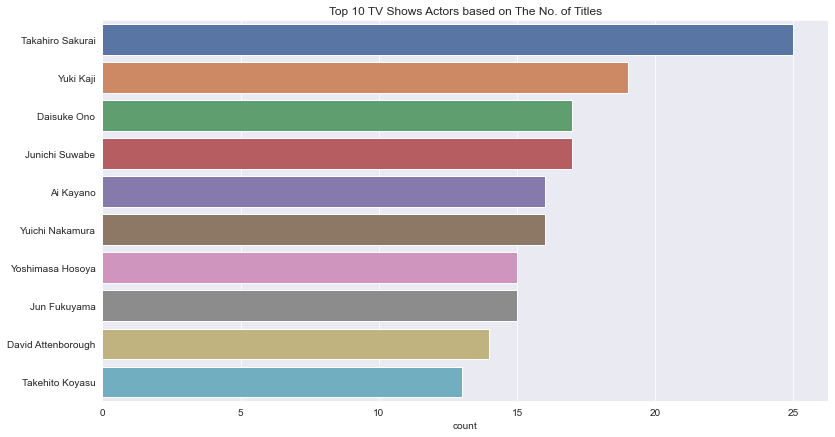

In [15]:
# Top 10 TV Shows Actors based on Number of Titles 

filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 TV Shows Actors based on The No. of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='deep')
plt.show()

---